In [59]:
#Import basic libraries to clean data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Imported this library to get rid of warnings that exposed my local directory
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [60]:
#Import excel file as a data frame
df = pd.read_excel('neighborhood1.xlsx')

In [61]:
#Visualize data to decide what will be my feature variables (input variables)
df.head()

,HID,Sqft,LandSqft,Neighbors,Stories,Pool,Bedrooms,Bathrooms,DateLastSold,PropertyTaxes2022,...,OCPABuildingValue2022,OCPAFeaturesValue2022,OCPAMarketValue2022,OCPAAssessedValue2022,OCPALandValue2021,OCPABuildingValue2021,OCPAFeaturesValue2021,OCPAMarketValue2021,OCPAAssessedValue2021,Notes
0,1,2250,5895,2,2,0,6,3,2019-06-12,5081.46,...,261569.0,1000.0,322569.0,287978.0,52000.0,208798.0,1000.0,261798.0,261798.0,NaN
1,2,1264,5893,2,1,0,3,2,2022-04-29,389.40,...,186280.0,0.0,246280.0,183775.0,52000.0,147806.0,0.0,199806.0,178422.0,"No Trulia Estimate, recently sold, and very lo..."
2,3,1454,5770,2,1,0,3,2,2002-11-21,1647.60,...,192309.0,1000.0,253309.0,120675.0,52000.0,152401.0,1000.0,205401.0,117160.0,NaN
3,4,2250,7933,2,2,0,3,3,2002-09-13,5170.68,...,268261.0,1500.0,329761.0,292700.0,52000.0,212591.0,1500.0,266091.0,266091.0,NaN
4,5,1855,10747,2,1,0,3,2,2012-10-10,4684.08,...,235139.0,0.0,295139.0,263669.0,52000.0,187699.0,0.0,239699.0,239699.0,NaN


In [62]:
#Look at the shape of the dataframe to get a better understanding of our data frame
df.shape

(48, 30)

In [63]:
#create a variable holding all the features that will be kept, including the feature and traget variables
columns_to_keep = ['Sqft', 'LandSqft', 'Neighbors', 'Stories', 'Pool', 'Bedrooms', 'Bathrooms','OCPAMarketValue2022']
#Create a new dataframe
df1 = df[columns_to_keep]
df1.head()

,Sqft,LandSqft,Neighbors,Stories,Pool,Bedrooms,Bathrooms,OCPAMarketValue2022
0,2250,5895,2,2,0,6,3,322569.0
1,1264,5893,2,1,0,3,2,246280.0
2,1454,5770,2,1,0,3,2,253309.0
3,2250,7933,2,2,0,3,3,329761.0
4,1855,10747,2,1,0,3,2,295139.0


In [64]:
#Check for null values inside the data frame
df1.isnull().sum()

Sqft                   0
LandSqft               0
Neighbors              0
Stories                0
Pool                   0
Bedrooms               0
Bathrooms              0
OCPAMarketValue2022    1
dtype: int64

In this dataset, we have null values, which means we need to address the issue of missingness. After careful consideration, I decided to drop the rows with missing values in the target variable. This decision was made because imputing or substituting values for the target variable could introduce bias or inaccuracies into the model, potentially leading to less reliable predictions. Dropping these rows ensures that the model is trained only on complete and accurate data, which I believe will result in a more robust and accurate model.

In [66]:
df1 = df1.dropna()

In [67]:
#Chack for that the data is clean 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 47
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sqft                 47 non-null     int64  
 1   LandSqft             47 non-null     int64  
 2   Neighbors            47 non-null     int64  
 3   Stories              47 non-null     int64  
 4   Pool                 47 non-null     int64  
 5   Bedrooms             47 non-null     int64  
 6   Bathrooms            47 non-null     int64  
 7   OCPAMarketValue2022  47 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 3.3 KB


In [68]:
#Create our feature variable
X = df1.drop('OCPAMarketValue2022', axis='columns')
X.head()

,Sqft,LandSqft,Neighbors,Stories,Pool,Bedrooms,Bathrooms
0,2250,5895,2,2,0,6,3
1,1264,5893,2,1,0,3,2
2,1454,5770,2,1,0,3,2
3,2250,7933,2,2,0,3,3
4,1855,10747,2,1,0,3,2


In [69]:
#Create our target variable
y = df1.OCPAMarketValue2022
y.head()

0    322569.0
1    246280.0
2    253309.0
3    329761.0
4    295139.0
Name: OCPAMarketValue2022, dtype: float64

In [70]:
#Import sklearn train/test split function to create our train test variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) #Use common parameters

In [71]:
#Import Linear Regression function to train our model and the score
from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()
LRmodel.fit(X_train,y_train)
LRmodel.score(X_test,y_test)

0.9330270360897117

In [72]:
#Cross-Validation
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.9830456 , 0.90557119, 0.87616987, 0.96572777, 0.97182284])

In [73]:
#Use input data to make predictions
new_data = np.array([[2000,7000, 2, 1, 0, 4, 2]]) 
prediction = LRmodel.predict(new_data)
print(prediction)

[309899.74802451]


In [74]:
# Create multiple new input data points
new_data = np.array([
    [2000, 7000, 2, 1, 0, 4, 2],  # Example 1
    [1800, 6000, 3, 2, 1, 3, 2],  # Example 2
    [2500, 8000, 2, 1, 0, 5, 3],  # Example 3
    [1600, 5500, 1, 1, 1, 2, 1],  # Example 4
    [2200, 7500, 2, 2, 0, 4, 3]   # Example 5
])

# Predict using your trained model
predicted_values = LRmodel.predict(new_data)

# Print results
for i, prediction in enumerate(predicted_values):
    print(f"Prediction {i+1}: {prediction:.2f}")


Prediction 1: 309899.75
Prediction 2: 289630.79
Prediction 3: 352945.66
Prediction 4: 287479.12
Prediction 5: 321272.22


In [75]:
predictions = LRmodel.predict(X_test)

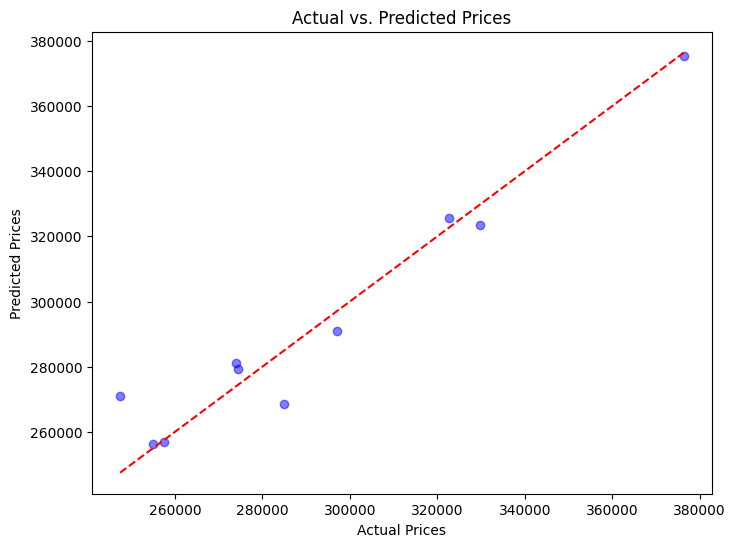

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Perfect predictions line

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()
